<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-description-of-data" data-toc-modified-id="Loading-and-description-of-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and description of data</a></span><ul class="toc-item"><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Duplicate-analysis" data-toc-modified-id="Duplicate-analysis-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Duplicate analysis</a></span></li><li><span><a href="#Analysis-of-missing-values" data-toc-modified-id="Analysis-of-missing-values-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Analysis of missing values</a></span></li><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Categorical Features</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Building-Model" data-toc-modified-id="Building-Model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Building Model</a></span></li><li><span><a href="#Monitoring-results" data-toc-modified-id="Monitoring-results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Monitoring results</a></span></li></ul></li></ul></div>

# LABORATORY 03: MACHINE LEARNING I - REGRESSION PROBLEM

## Loading and description of data

A dataset with Moscow catering establishments is available to us, compiled on the basis of data from Yandex Maps and Yandex Business services for the summer of 2022. The information posted in the Yandex Business service could have been added by users or found in publicly available sources.

**Description of the data**

*moscow_places.csv file:*
- *name* — the name of the institution;
 - *address* — address of the institution;
 - *category* — the category of the establishment, for example, "cafe", "pizzeria" or "coffee shop";
 - *hours* — information about working days and hours;
 - *lat* — latitude of the geographical point where the institution is located;
 - *lng* — the longitude of the geographical point where the institution is located;
 - *rating* — the rating of the institution according to user ratings in Yandex Maps (the highest rating is 5.0);
 - *price* — the category of prices in the institution, for example, "average", "below average", "above average" and so on;
 - *avg_bill* is a string that stores the average cost of an order as a range;
 - *middle_avg_bill* is a number with an average check score, which is specified only for values from the avg_bill column starting with the substring "Average bill";
 - *middle_coffee_cup* is a number with the rating of one cup of cappuccino, which is specified only for values from the avg_bill column starting with the substring "Price of one cup of cappuccino";
 - *chain* — a number expressed as 0 or 1, which indicates whether the institution is a network one (errors may occur for small networks):
      - 0 — the institution is not a network one
      - 1 — the institution is a network
 - *district* — the administrative district in which the institution is located, for example, the Central Administrative District;
 - *seats* — the number of seats.

In [68]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os

!pip install phik -q
import phik

### Load the dataset

In [69]:
local_path = 'C:/Users/tonya/Downloads/moscow_places (1).csv'
server_path = 'https://code.s3.yandex.net/datasets/moscow_places.csv'

if os.path.exists(local_path):
    dataset = pd.read_csv(local_path)
elif os.path.exists(server_path):
    dataset = pd.read_csv(server_path)
else:
    dataset = pd.read_csv('moscow_places.csv', delimiter=',')

In [70]:
def explore_dataframe(df, table_name, print_head=5, print_info=True):

    print(f"Table analysis: {table_name}")

    # Вывод первых n строк
    print(f"The first {print_head} rows of the table:")
    display(df.head(print_head))

    # Вывод информации о DataFrame
    if print_info:
        print("\nInformation about the table:")
        df.info()

    # Анализ пропусков
    print("\nThe number and percentage of omissions in the dataframe:")
    missing_report = df.isna().sum().to_frame()
    missing_report = missing_report.rename(columns={0: 'missing_values'})
    missing_report['% of total'] = ((missing_report['missing_values'] / df.shape[0])*100).round(2)
    display(missing_report.sort_values(by='missing_values', ascending=False))

    # Анализ дубликатов
    print("\nThe number of explicit duplicates:", df.duplicated().sum())
    # Вычисление доли дубликатов
    print("\nThe proportion of duplicates:", "{:.2%}".format(df.duplicated().sum() / len(df)))
    # Анализ распределения численных значений
    print("\nDescriptive statistics of the table:")
    display(df.describe())



In [71]:
explore_dataframe(dataset, 'Information about the catering establishments')

Table analysis: Information about the catering establishments
The first 5 rows of the table:


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0



Information about the table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB

The number and percentage of o

,missing_values,% of total
middle_coffee_cup,7871,93.64
middle_avg_bill,5257,62.54
price,5091,60.56
avg_bill,4590,54.60
seats,3611,42.96
hours,536,6.38
name,0,0.00
category,0,0.00
address,0,0.00
district,0,0.00



The number of explicit duplicates: 0

The proportion of duplicates: 0.00%

Descriptive statistics of the table:


,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


In [72]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  8406
#Features =  14


In order to exclude possible duplicates in advance, we will bring the text in columns with the address, name and average cost of the institution to the same style: we will make all capital letters lowercase and change the letter 'ё' to 'e'.

In [73]:
for col in ['address', 'name', 'avg_bill']:
    dataset[col] = dataset[col].str.replace('ё', 'е').str.lower()

Let's check if the number of unique names has changed after converting the data in the columns to the same style.

In [74]:
dataset['address'].nunique()

5752

In [75]:
dataset['name'].nunique()

5506

The number of unique addresses decreased by only 1, the number of unique names decreased from 5614 to 5506.

**Output**

There are 8406 entries in the dataset. Information is provided about 5506 establishments.

There are 14 columns in the table in total:
- the following columns belong to the object data type:
   - name,
   - category,
- address,
- area,
- opening hours,
   - price category,
- the average cost of the order.
- the float data type includes columns:
   - latitude,
   - longitude,
   - rating,
   - assessment of the average check,
   - evaluation of one cup of cappuccino,
   - the number of seats.
- the int data type includes a column indicating whether the institution is a network one.

All data is adjusted to the desired data type, except for the number of seats in the institution. This column with data should be converted to the int type, because the number of places cannot be more than an integer.

All column names have the correct title style.

You can immediately notice a large number of gaps in some columns. There are no obvious duplicates in the data.

When studying descriptive statistics, abnormal values are observed: for example, there is an institution in which the number of seats is 1288. In further analysis, you should consider the values in some columns in a little more detail.  

There are 8 categories of establishments, including:
- cafe,
- restaurant,
- coffee shop,
- bar,pub,
- pizzeria,
- fast food,
- dining room,
- bakery.

There are 9 administrative districts in the dataset:
- Central District,
- Northern District,
- Southern District,
- North-Eastern District,
- Western District,
- Eastern District,
- Southeastern District,
- Southwestern District,
- North-Western district.

In [76]:
# manage metadata
def get_metadata(dataset):
    metadata = dataset.columns
    numerical_cols = dataset.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = dataset.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

In [77]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)

Numerical features:  ['lat', 'lng', 'rating', 'middle_avg_bill', 'middle_coffee_cup', 'chain', 'seats']
Categorical features:  ['name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']


### Exploratory Data Analysis (EDA)

#### Duplicate analysis

No obvious duplicates were found during the initial analysis. It is necessary to check for the presence of implicit duplicates.

Let's see how many implicit duplicates there are for the same name and address.

In [78]:
dataset.duplicated(subset=['name','address']).sum()

4

4 implicit duplicates have been detected, let's look at them in more detail.

Let's display all 4 duplicates on the screen and look at each one in more detail.

In [79]:
dataset[dataset.duplicated(subset=['name','address'])]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


In [80]:
dataset.loc[(dataset['name']=='хлеб да выпечка') &
    (dataset['address'] == 'москва, ярцевская улица, 19')]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


Two establishments with the name "хлеб да выпечка" have different categories and coordinates, so it is impossible to say unequivocally that this is the same place and is a duplicate.

It is quite possible that in one house in the next door there is a bakery with only desserts and coffee only with breakfasts under the same name.

Therefore, we will add a third parameter to search for implicit duplicates - latitude, and see how many duplicates are left.

In [81]:
dataset[dataset.duplicated(subset=['name','address', 'lat'])]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0


Now there is only one implicit duplicate left, let's print it and delete it.

In [82]:
dataset.loc[(dataset['name']=='more poke') &
    (dataset['address'] == 'москва, волоколамское шоссе, 11, стр. 2')]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0


In [83]:
dataset = dataset.drop(1430).reset_index(drop=True)
dataset.duplicated(subset=['name','address', 'lat']).sum()

0

The duplicate was deleted correctly. It was line 1430 that was deleted, because it contains less accurate information about the opening hours of the institution.

#### Analysis of missing values

In [84]:
# function to filter missing data
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name="missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()

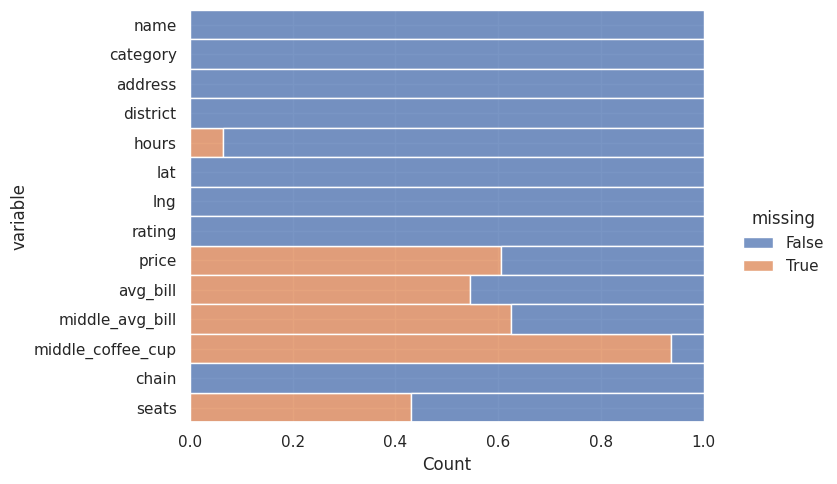

In [85]:
# original state of missing values
filter_missing(dataset)

Omissions are present in 6 of the 14 columns. Most of all there are omissions in the evaluation value of one cup of cappuccino - 93.64%, then there is an assessment of the average bill - 62.54%, in the price category, the average cost of the order, the number of seats and opening hours there are also omissions - 60.56%, 54.6%, 42.96% and 6.38%, respectively.

In this case, we cannot replace the omissions in any column. The average or median value will not work, because each institution has its own unique values, which depend on different factors.

#### Numerical Features

In [86]:
# function to plot histogram of frequencies
def hist_frequencies(data, numeric_cols, bins):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()

    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

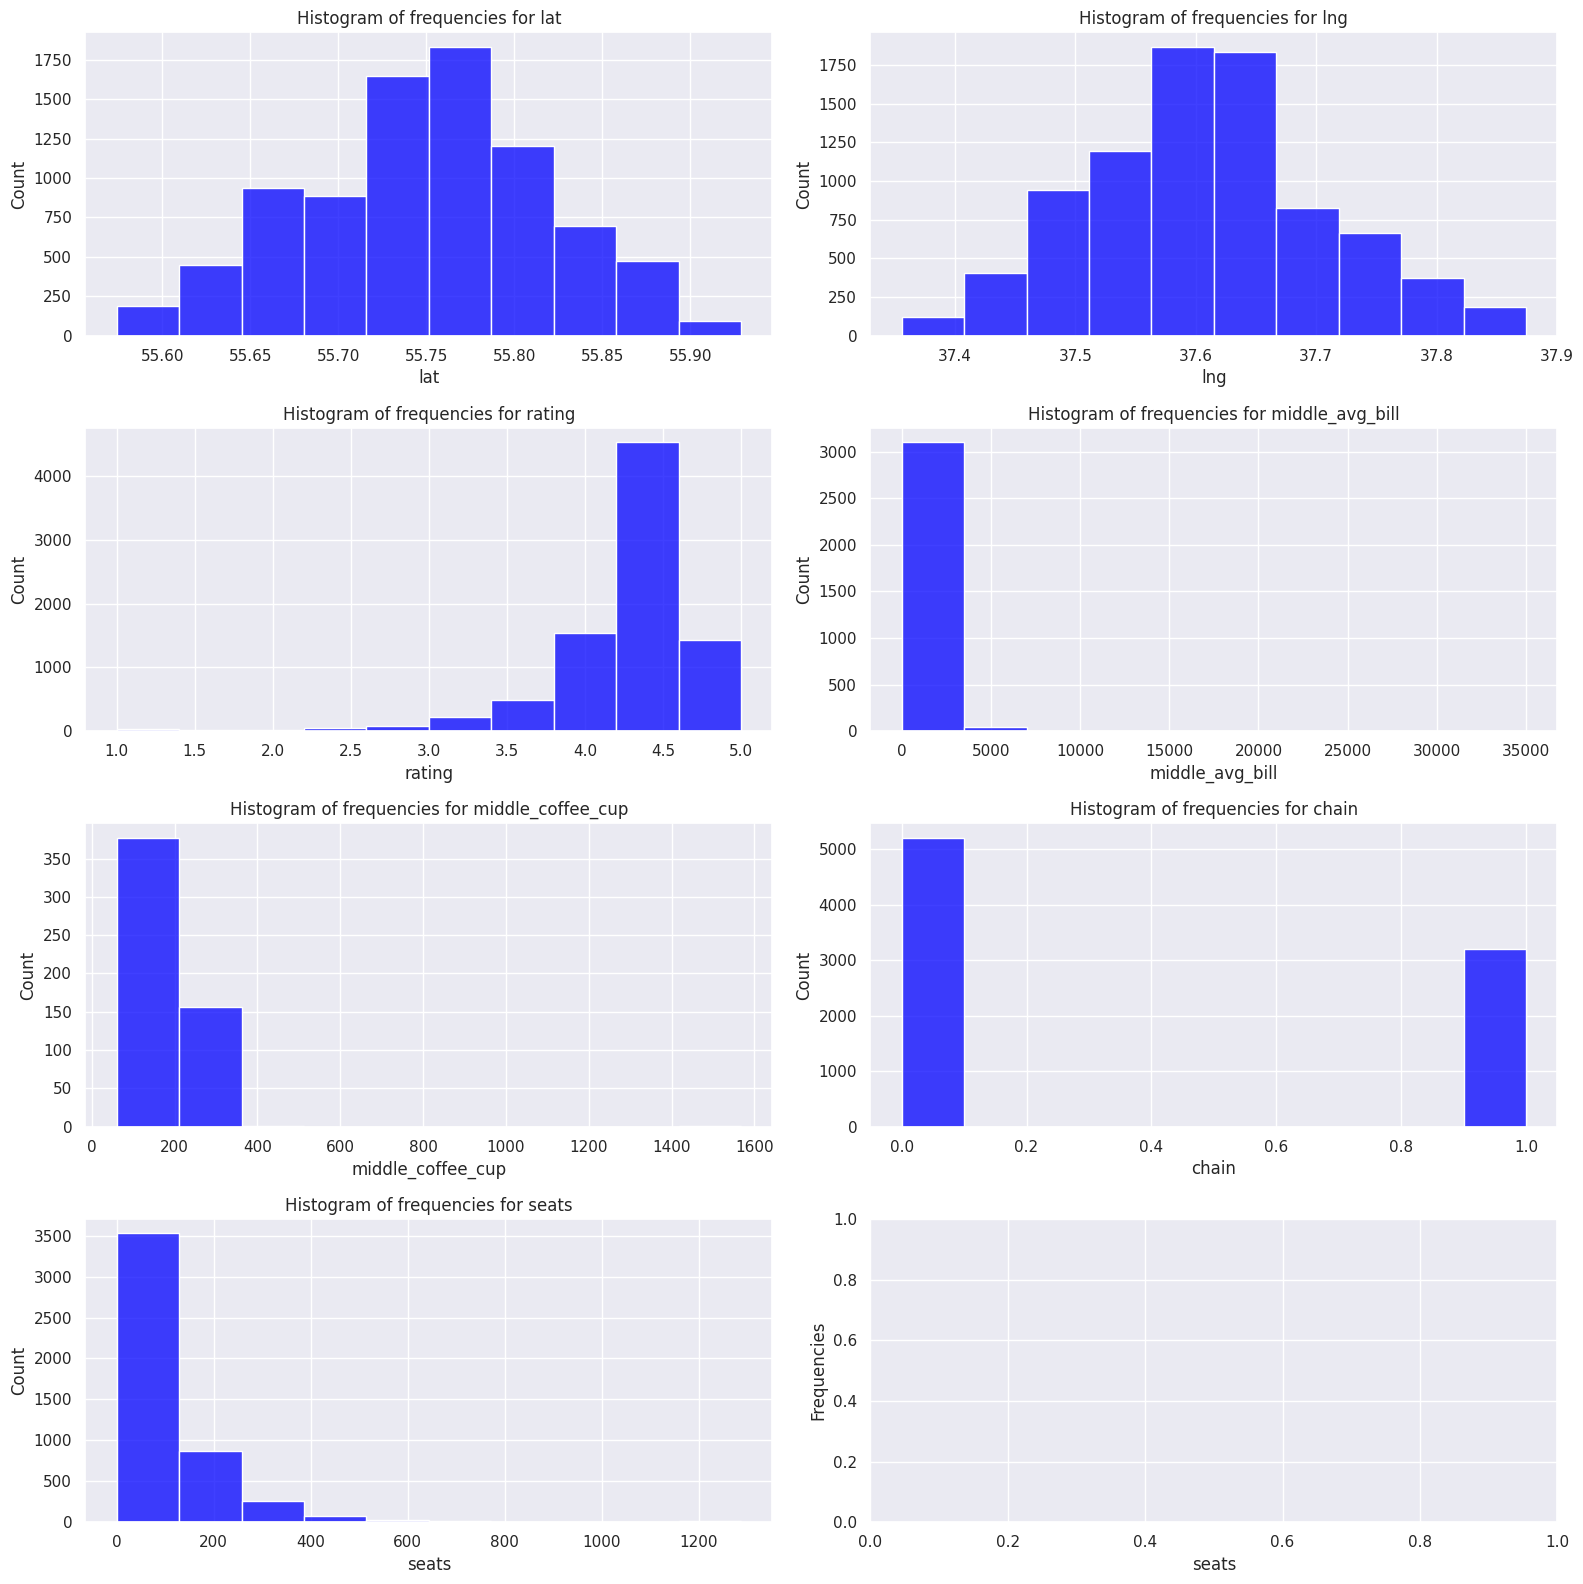

In [87]:
hist_frequencies(dataset, numeric_cols, bins = 10)

The largest number of establishments are located in the center of Moscow, judging by the frequency distribution of coordinates. The rating of establishments is most often in the range from 4.2 to 4.6. The average check is no more than 4 thousand, a cup of coffee usually costs 200 rubles. Non-chain establishments prevail in Moscow, the number of places is no more than 100.

In [88]:
# statistical metrics
display(dataset[numeric_cols].describe())

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8405.000000,8405.000000,8405.000000,3149.000000,535.000000,8405.000000,4794.000000
mean,55.750102,37.608584,4.229899,958.053668,174.721495,0.381321,108.405090
std,0.069659,0.098595,0.470376,1009.732845,88.951103,0.485740,122.840831
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538626,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753407,37.605260,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795033,37.664793,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


#### Categorical Features

Categorical features have already been analyzed above in the primary analysis of the dataset.

### Data Preparation

Feature Engineer

To determine which columns can be removed from your dataset, you first need to evaluate which of them are not relevant to the regression problem being solved.

- name: a text attribute, and the probability that it will be useful for linear regression is low.

- address: Usually does not carry significant information for the model, it can be deleted.

- hours: a complex text, it can be ignored.

- district: a categorical attribute, it can be deleted without conversion to the desired format.

In [89]:
# drop the columns which don't have any relevance
def feature_engineer(data):

    # drop non-relevant columns
    nrelev_cols = ["name", "address", "hours", "district"]
    data = data.drop(nrelev_cols, axis = 1)

    return data

In [90]:
dataset = feature_engineer(dataset)

In [91]:
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  8405
#features =  10


In [92]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)
print("Numerical features: ", numeric_cols)
print("Categorical features: ", categ_cols)

Numerical features:  ['lat', 'lng', 'rating', 'middle_avg_bill', 'middle_coffee_cup', 'chain', 'seats']
Categorical features:  ['category', 'price', 'avg_bill']
Numerical features:  ['lat', 'lng', 'rating', 'middle_avg_bill', 'middle_coffee_cup', 'chain', 'seats']
Categorical features:  ['category', 'price', 'avg_bill']


Data imputation with K-Nearest Neighbors (KNN)

In [93]:
from sklearn.impute import KNNImputer

def imputation_data(data, num_cols, categ_cols):
    # imputation for numerical columns
    knn_imputer = KNNImputer(n_neighbors = 5)
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])
    # imputation for categorical columns
    for col in categ_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

    return data

In [94]:
data = imputation_data(dataset, numeric_cols, categ_cols)
data.head()

,category,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,кафе,55.878494,37.478860,5.0,средние,средний счет:1000–1500 ₽,500.0,195.0,0.0,83.6
1,ресторан,55.875801,37.484479,4.5,выше среднего,средний счет:1500–1600 ₽,1550.0,171.6,0.0,4.0
2,кафе,55.889146,37.525901,4.6,средние,средний счет:от 1000 ₽,1000.0,180.4,0.0,45.0
3,кофейня,55.881608,37.488860,5.0,средние,цена чашки капучино:155–185 ₽,500.0,170.0,0.0,57.2
4,пиццерия,55.881166,37.449357,5.0,средние,средний счет:400–600 ₽,500.0,172.4,1.0,148.0


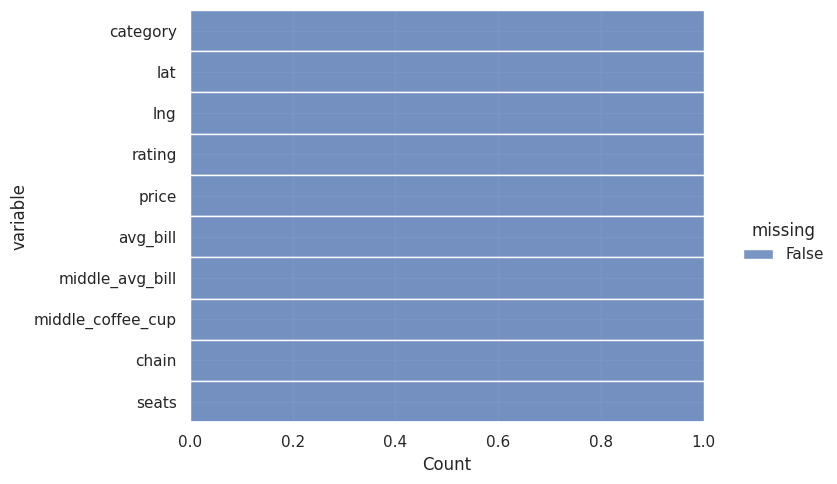

In [95]:
# state of missing values after imputation
filter_missing(dataset)

Exploration of Data after Imputation

In [96]:
# check type of relationship between variables
def gen_pairplot(data, metadata):
    sbn.set_theme(context = 'notebook', style = 'darkgrid')
    sbn.pairplot(data[metadata], height = 2.0)
    plt.show()

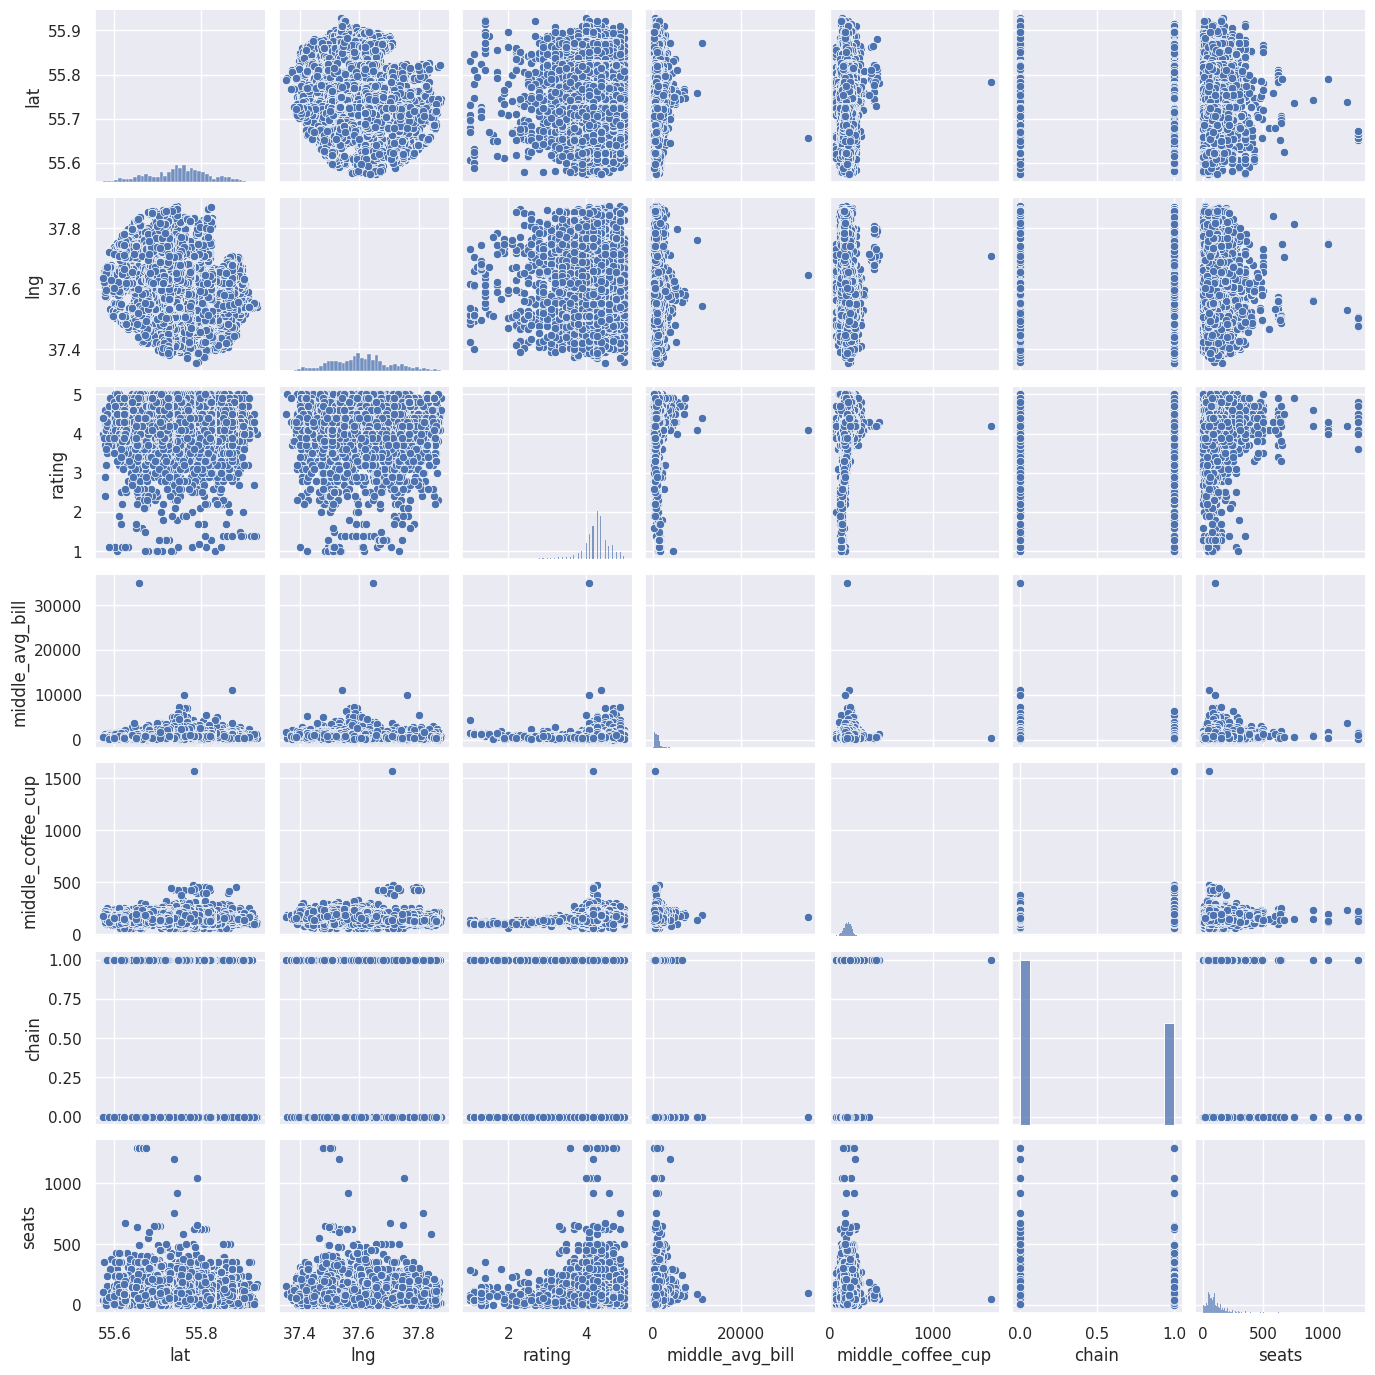

In [97]:
gen_pairplot(dataset, numeric_cols)

In [98]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

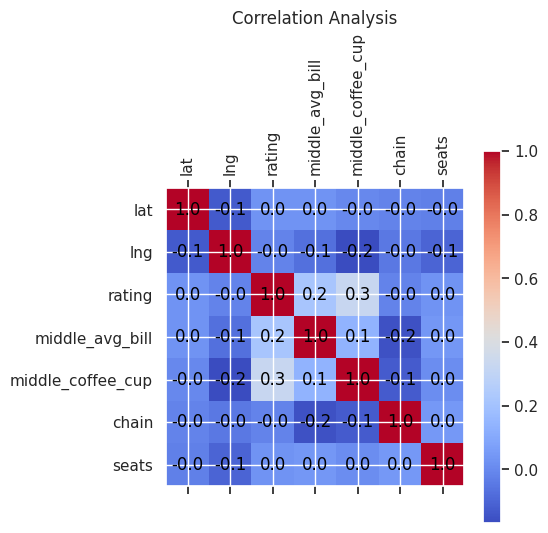

In [99]:
plot_correlation(dataset, numeric_cols)

There are no noticeable relationships between pairs of features according to the graphs, which is also confirmed by the correlation matrix of relationships. The rating and the price of a cup of coffee are most strongly associated with the value 0.3.

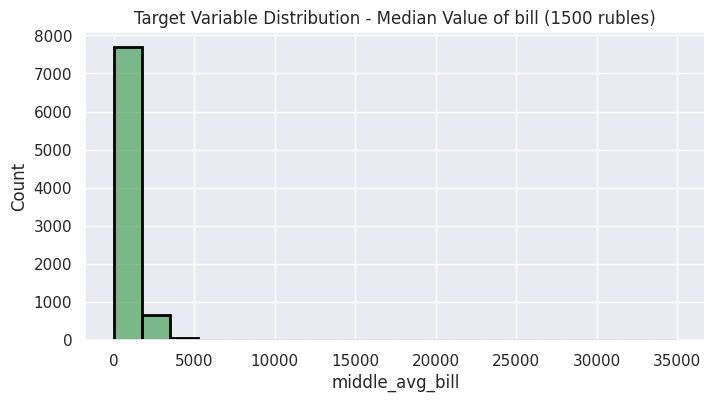

In [100]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["middle_avg_bill"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median Value of bill (1500 rubles)")
plt.show()

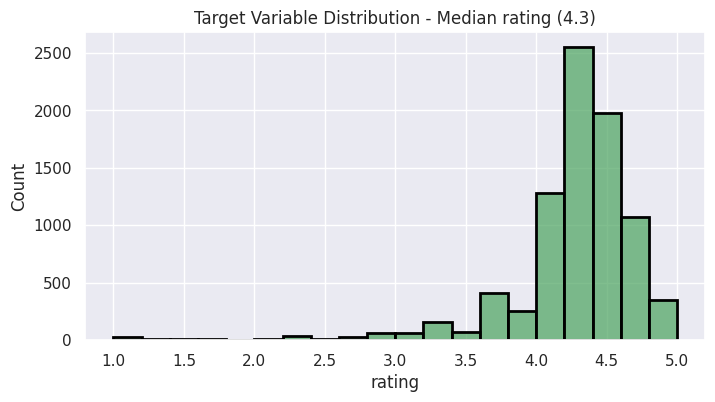

In [101]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["rating"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median rating (4.3)")
plt.show()

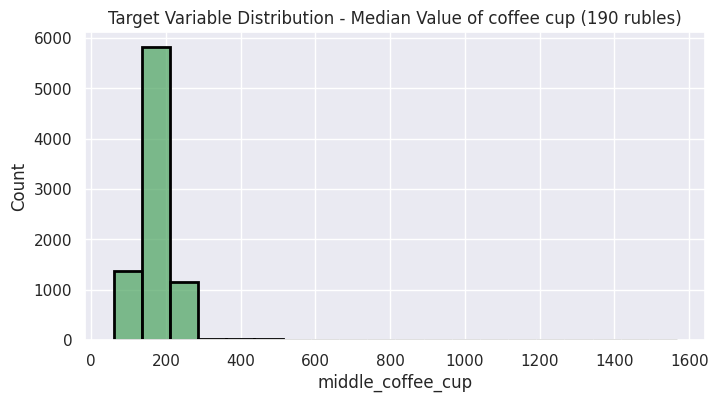

In [102]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["middle_coffee_cup"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median Value of coffee cup (190 rubles)")
plt.show()

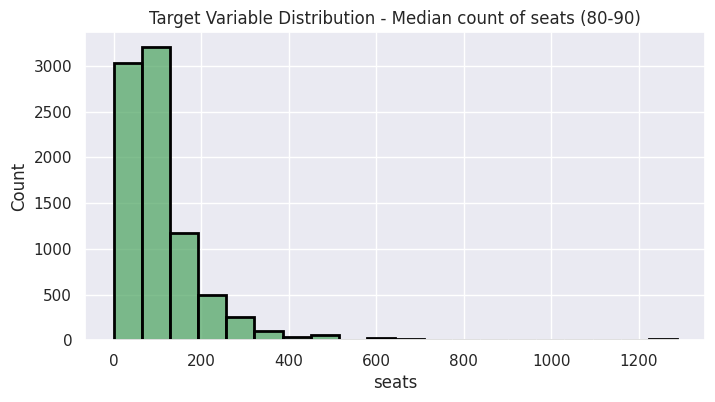

In [103]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["seats"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median count of seats (80-90)")
plt.show()

### Data Preprocessing

In [104]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "rating"]  # rating – целевая переменная
y = dataset["rating"]

In [105]:
x.head()

,category,lat,lng,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,кафе,55.878494,37.478860,средние,средний счет:1000–1500 ₽,500.0,195.0,0.0,83.6
1,ресторан,55.875801,37.484479,выше среднего,средний счет:1500–1600 ₽,1550.0,171.6,0.0,4.0
2,кафе,55.889146,37.525901,средние,средний счет:от 1000 ₽,1000.0,180.4,0.0,45.0
3,кофейня,55.881608,37.488860,средние,цена чашки капучино:155–185 ₽,500.0,170.0,0.0,57.2
4,пиццерия,55.881166,37.449357,средние,средний счет:400–600 ₽,500.0,172.4,1.0,148.0


In [106]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (8405, 9)
Dimension of target =  (8405,)


Split train and test set

In [107]:
# split train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (6724, 9)
Y-train:  6724
X-test dim:  (1681, 9)
Y-test:  1681


Transforming the numerical and categorical data

In [108]:
# Определение категориальных и числовых колонок
numeric_cols = ["lat", "lng", "price", "avg_bill", "middle_avg_bill", "middle_coffee_cup", "seats"]
categ_cols = ["name", "category", "chain", "district"]

print("Numerical features:", numeric_cols)
print("Categorical features:", categ_cols)

Numerical features: ['lat', 'lng', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', 'seats']
Categorical features: ['name', 'category', 'chain', 'district']


<center><b>Criteria to scale numerical features<b> </center>   

**Standard Scaler**  

$$X' = \frac{X - \mu}{\sigma}$$
  
where:  
  
* $X$ is the original feature value  
* $X'$ is the scaled feature value  
* $\mu$ is the mean of the feature values  
* $\sigma$ is the standard deviation of the feature values  
  
**Robust Scaler**  
  
$$X' = \frac{X - Q_1}{Q_3 - Q_1}$$  
  
where:  
  
* $X$ is the original feature value  
* $X'$ is the scaled feature value  
* $Q_1$ is the first quartile (25th percentile) of the feature values  
* $Q_3$ is the third quartile (75th percentile) of the feature values  
  
Note: The Robust Scaler uses the interquartile range (IQR) instead of the standard deviation to make it more robust to outliers.


In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
import numpy as np

# Создаем трансформер
transformer = make_column_transformer(
    (StandardScaler(), ["lat", "lng"]),  # Масштабирование данных
    (RobustScaler(), ["middle_avg_bill", "middle_coffee_cup", "seats"]),
    (OneHotEncoder(handle_unknown="ignore"), ["category", "chain"]),
    (OrdinalEncoder(), ["price"])
)

# Применение трансформаций
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)


In [110]:
x_train

array([[ 0.14552719, -0.1132618 ,  1.47928994, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61709154,  1.75779402, -0.18934911, ...,  1.        ,
         0.        ,  3.        ],
       [ 0.2583386 ,  0.1873099 ,  0.22189349, ...,  1.        ,
         0.        ,  3.        ],
       ...,
       [-0.03826295,  0.47150782,  1.13757396, ...,  1.        ,
         0.        ,  3.        ],
       [-0.15483282, -1.03176664, -0.00739645, ...,  0.        ,
         1.        ,  3.        ],
       [ 0.88021256,  1.96249686,  0.22928994, ...,  0.        ,
         1.        ,  3.        ]])

In [111]:
y_train

,rating
3538,4.4
2590,4.5
4757,4.4
7398,4.1
7937,4.5
...,...
4373,4.2
7891,4.2
4859,4.7
3264,4.2


### Building Model

Benchmark for models:

* XGBoost Regressor
* LightGBM

In [112]:
from sklearn.model_selection import GridSearchCV
import time

In [113]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [114]:
# function to load model
def load_model(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

<center> <b>Criteria to evaluate quality of model<b> </center>  
  
**RMSE (Root Mean Squared Error)**
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

where:

* $y_i$ is the actual value of the $i^{th}$ observation
* $\hat{y}_i$ is the predicted value of the $i^{th}$ observation
* $n$ is the total number of observations

**R2 (Coefficient of Determination)**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

where:

* $y_i$ is the actual value of the $i^{th}$ observation
* $\hat{y}_i$ is the predicted value of the $i^{th}$ observation
* $\bar{y}$ is the mean of the actual values
* $n$ is the total number of observations


In [115]:
# function to evaluate model
from sklearn.metrics import mean_squared_error, r2_score

def eval_model_perform(model, x, y):
    y_pred = model.predict(x)
    rmse_val = np.sqrt(mean_squared_error(y, y_pred))
    r2_val = r2_score(y, y_pred)

    return rmse_val, r2_val

**5.1. XGBoost Regressor**

Model Definition

In [116]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_params = {
    "max_depth": [8, 16, 32],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.8, 0.9],
    "tree_method": ["hist"],
    "objective": ["reg:squarederror"]
}

In [117]:
def XGBModel(x_train, y_train, params):
    model = xgb.XGBRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best params:", grid_search.best_params_)
    return best_model

xgb_model = XGBModel(x_train, y_train, xgb_params)

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 16, 'objective': 'reg:squarederror', 'subsample': 0.7, 'tree_method': 'hist'}


Training process

In [118]:
sttrain_xgb = time.time()

In [119]:
ettrain_xgb = time.time()
ttrain_xgb = ettrain_xgb - sttrain_xgb
print(f"Time of training: {ttrain_xgb:.3f} seconds")

Time of training: 1.856 seconds


In [120]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
import os

# Создаём папку models, если она не существует
if not os.path.exists("models"):
    os.makedirs("models")
# save xgb model
save_model("models/xgb_v1.pkl", xgb_model)

Evaluation process

In [124]:
# recover the model
rec_xgb = load_model("models/xgb_v1.pkl")

In [125]:
# metrics for train set
rmse_xgb_train, r2_xgb_train = eval_model_perform(rec_xgb, x_train, y_train)
print(f"R-MSE train score: {rmse_xgb_train:.3f}")
print(f"R^2 train score: {r2_xgb_train:.3f}")

R-MSE train score: 0.011
R^2 train score: 0.999


In [126]:
# r2-score for test set
rmse_xgb_test, r2_xgb_test = eval_model_perform(rec_xgb, x_test, y_test)
print(f"R-MSE test score: {rmse_xgb_test:.3f}")
print(f"R^2 test score: {r2_xgb_test:.3f}")

R-MSE test score: 0.231
R^2 test score: 0.722


**5.2. Light Gradient Boost Machine (LightGBM)**

Model Definition

In [127]:
# import packages
import lightgbm as lgbm

# define grid hyperparameters
lgbm_params = {
    "num_leaves": [64, 128, 256],
    "max_depth": [10, 20, 40],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9],
    "subsample_freq": [10]
}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [128]:
# define the LightGBM regressor
def LightGBModel(x_train, y_train, params):
    lgbm_model = lgbm.LGBMRegressor()

    # hyperparameter optimization
    grid_lgbm = GridSearchCV(estimator = lgbm_model,  # regressor model
                         param_grid = params,  # dict of hyperparameters
                         cv = 5,   # 5-fold cross-validation
                         scoring = "r2",
                         verbose = False,
                         n_jobs = -1
                    )
    # fit the model
    grid_lgbm.fit(x_train, y_train)

    # take best model
    best_model = grid_lgbm.best_estimator_
    print(grid_lgbm.best_params_)

    return best_model

Training process

In [129]:
sttrain_lgbm = time.time()

In [130]:
# take the best model
lgbm_model = LightGBModel(x_train, y_train, lgbm_params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 6724, number of used features: 16
[LightGBM] [Info] Start training from score 4.226859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [131]:
ettrain_lgbm = time.time()
ttrain_lgbm = ettrain_lgbm - sttrain_lgbm
print(f"Time of training: {ttrain_lgbm:.3f}")

Time of training: 109.907


In [132]:
lgbm_model

LGBMRegressor(max_depth=20, num_leaves=128, subsample=0.9, subsample_freq=10)

In [133]:
# save ligthgbm model
save_model("models/lgbm_v1.pkl", lgbm_model)

Evaluation process

In [134]:
# recover the model
rec_lgbm = load_model("models/lgbm_v1.pkl")

In [135]:
# metrics for train set
rmse_lgbm_train, r2_lgbm_train = eval_model_perform(rec_lgbm, x_train, y_train)
print(f"R-MSE train score: {rmse_lgbm_train:.3f}")
print(f"R^2 train score: {r2_lgbm_train:.3f}")

R-MSE train score: 0.130
R^2 train score: 0.926


In [136]:
# r2-score for test set
rmse_lgbm_test, r2_lgbm_test = eval_model_perform(rec_lgbm, x_test, y_test)
print(f"R-MSE test score: {rmse_lgbm_test:.3f}")
print(f"R^2 test score: {r2_lgbm_test:.3f}")

R-MSE test score: 0.246
R^2 test score: 0.683


### Monitoring results

In [137]:
dict_res = {
    "xgboost": pd.DataFrame({
        "train": {"rmse": rmse_xgb_train, "r2": r2_xgb_train},
        "test": {"rmse": rmse_xgb_test, "r2": r2_xgb_test}
    }),
    "lgbm": pd.DataFrame({
        "train": {"rmse": rmse_lgbm_train, "r2": r2_lgbm_train},
        "test": {"rmse": rmse_lgbm_test, "r2": r2_lgbm_test}
    })
}

In [138]:
for key, res in dict_res.items():
    print(f"\nModel: {key}")
    print(res)


Model: xgboost
         train      test
rmse  0.010976  0.230741
r2    0.999473  0.721619

Model: lgbm
         train      test
rmse  0.130463  0.246175
r2    0.925568  0.683132


XGBoost: The model is highly overfitted to the training data. It has an excellent performance on the training set (very low RMSE and high R²), but struggles on the test set, leading to a large discrepancy between the training and test performance. This indicates that the model has likely memorized the training data, resulting in poor generalization to unseen data.

LightGBM: The model is less overfitted compared to XGBoost. While its performance on the training data is not as strong (higher RMSE and lower R²), it shows a more balanced performance on the test set. This suggests that LightGBM is slightly better at generalizing to unseen data compared to XGBoost.

In [139]:
import seaborn as sns

def plot_reg_results(res):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Iterate over the dictionary and plot the results for each model
    sns.set_theme(style="whitegrid")
    for i, (key, res) in enumerate(dict_res.items()):
        # Plot the RMSE values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["rmse"], res["test"]["rmse"]], ax=ax[0])
        # Plot the R2 values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["r2"], res["test"]["r2"]], ax=ax[1])

    # Set the titles and labels for the subplots
    ax[0].set_title("RMSE")
    ax[0].set_xlabel("Model")
    ax[0].set_ylabel("RMSE")

    ax[1].set_title("R2")
    ax[1].set_xlabel("Model")
    ax[1].set_ylabel("R2")

    # Show the plot
    plt.show()


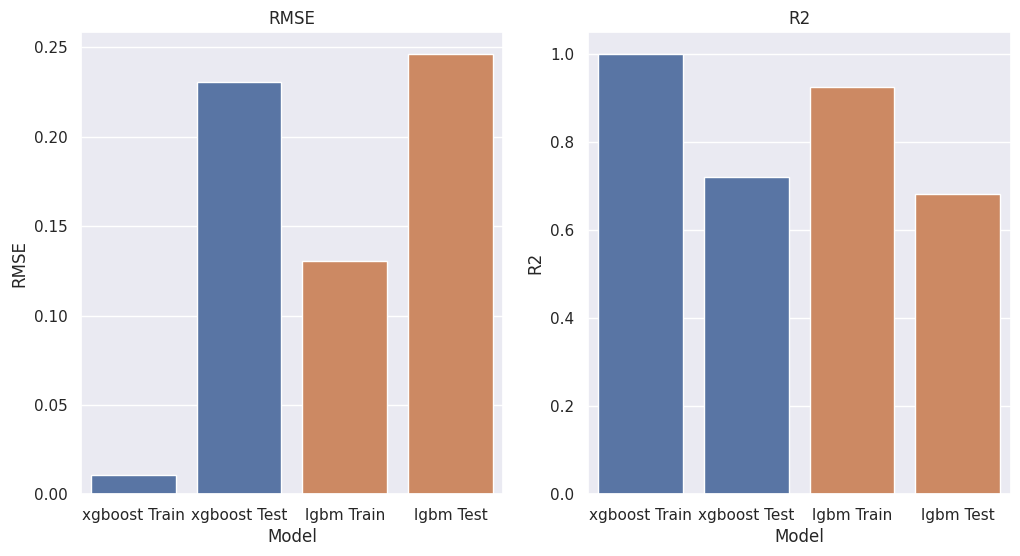

In [140]:
# monitoring the results
plot_reg_results(dict_res)